In [1]:
import io
import requests
import json
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime

from sklearn.metrics import confusion_matrix
from io import StringIO

import gzip
import json
import os
import sys
import traceback
import uuid
from pprint import pprint

import boto3
import pandas as pd
import numpy as np
import io
from io import StringIO
import requests
from botocore.vendored.requests.packages import urllib3
import datetime
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from aws_requests_auth.aws_auth import AWSRequestsAuth
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
# from tensorflow import set_random_seed
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)


from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers

import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")



/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/danieldutu/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [2]:
df = pd.read_csv('file_name.csv')  

In [3]:
df.head()

,BatchNo,Value
0,2019-07-03,11.905714
1,2019-07-04,14.214074
2,2019-07-05,13.620000
3,2019-07-06,13.620000
4,2019-07-07,13.620000


In [5]:
df.index = df.BatchNo

In [10]:
df = df.drop(['BatchNo'],axis =1)

[Text(0, 0.5, 'Unit Measure'), Text(0.5, 0, 'Dates')]

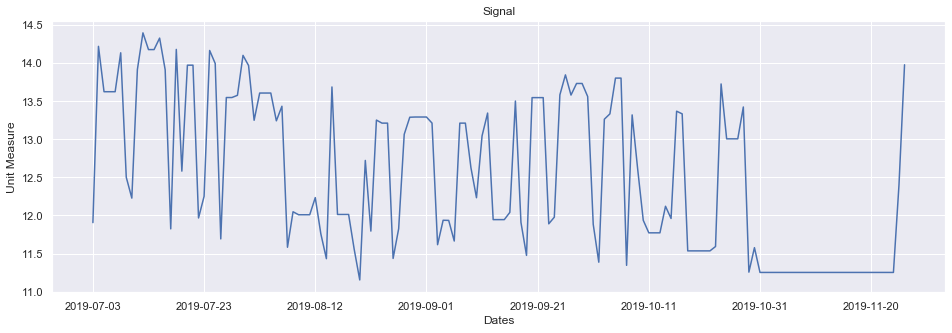

In [15]:
ax = df.Value.plot(figsize = (16,5), title = "Signal")
ax.set(xlabel='Dates', ylabel='Unit Measure')


In [17]:
df.reset_index(inplace=True)
df['BatchNo'] = pd.to_datetime(df['BatchNo'])
df = df.set_index('BatchNo')

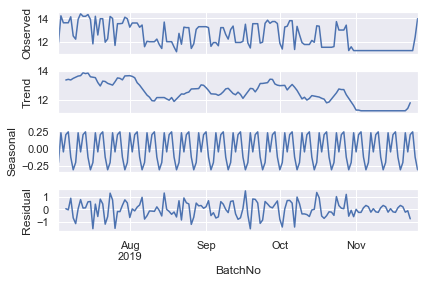

In [18]:
a = seasonal_decompose(df.Value, model = "add")
a.plot();

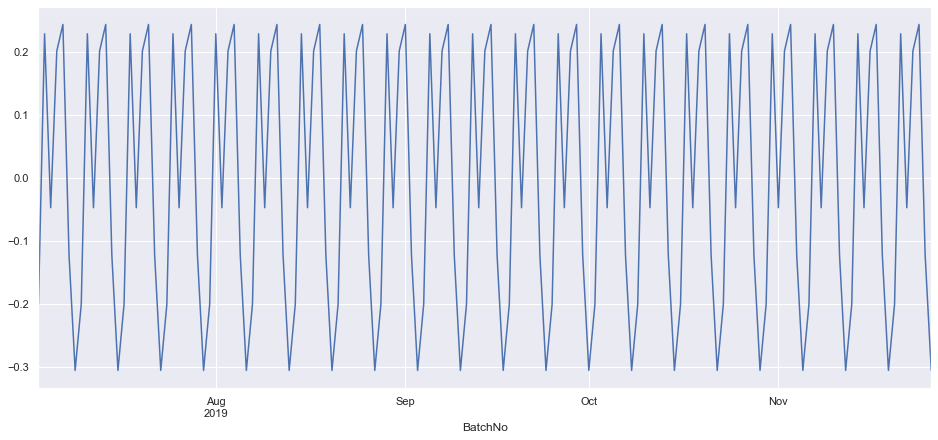

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# Arima Forecast

In [20]:
auto_arima(df.Value, seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  147
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -174.755
Date:                Tue, 23 Jun 2020   AIC                            357.509
Time:                        23:11:13   BIC                            369.444
Sample:                             0   HQIC                           362.359
                                - 147                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0072      0.002     -3.539      0.000      -0.011      -0.003
ar.L1          0.4126      0.090      4.562      0.000       0.235       0.590
ma.L1         -0.9998      1.852     -0.540      0.589      -4.629       2.630
sigma2         0.6236      1.156      0.540      0.590      -1.642       2.889
===================================================================================
Ljung-Box (Q):                       31.09   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.84   Prob(JB):                         0.68
Heteroskedasticity (H):               0.49   Skew:                             0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
train_data = df[:len(df)-24]
test_data = df[len(df)-24:]

In [26]:
arima_model = SARIMAX(train_data.Value, order = (2,0,0), seasonal_order = (0,0,1,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  123
Model:             SARIMAX(2, 0, 0)x(0, 0, 1, 12)   Log Likelihood                -171.114
Date:                            Tue, 23 Jun 2020   AIC                            350.228
Time:                                    23:11:25   BIC                            361.476
Sample:                                07-03-2019   HQIC                           354.797
                                     - 11-02-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6868      0.111      6.182      0.000       0.469       0.905
ar.L2          0.3109      0.110      2.831      0.005       0.096       0.526
ma.S.L12      -0.0284      0.106     -0.269      0.788      -0.236       0.179
sigma2         0.9069      0.108      8.391      0.000       0.695       1.119
===================================================================================
Ljung-Box (Q):                       43.87   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.31   Prob(JB):                         0.55
Heteroskedasticity (H):               0.87   Skew:                            -0.10
Prob(H) (two-sided):                  0.66   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2019-11-03    11.228163
2019-11-04    11.208709
2019-11-05    11.127784
2019-11-06    11.128678
2019-11-07    11.108617
2019-11-08    11.089022
2019-11-09    11.056356
2019-11-10    11.098254
2019-11-11    11.070991
2019-11-12    11.060709
2019-11-13    11.041133
2019-11-14    11.021653
2019-11-15    11.002926
2019-11-16    10.984006
2019-11-17    10.965189
2019-11-18    10.946383
2019-11-19    10.927615
2019-11-20    10.908878
2019-11-21    10.890174
2019-11-22    10.871501
2019-11-23    10.852860
2019-11-24    10.834251
2019-11-25    10.815675
2019-11-26    10.797130
Freq: D, Name: ARIMA Predictions, dtype: float64

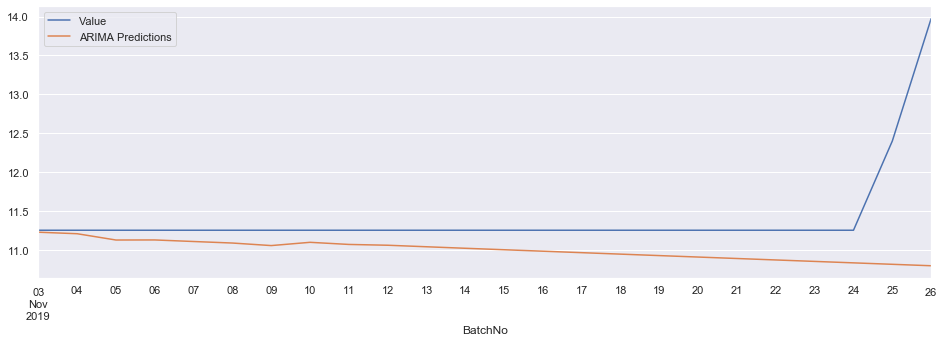

In [28]:
test_data.Value.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [29]:
arima_rmse_error = rmse(test_data.Value, arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df.Value.mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 0.5859116888750688
RMSE Error: 0.7654486846778619
Mean: 12.516307436559854


In [30]:
test_data['ARIMA_Predictions'] = arima_pred

# LSTM

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [32]:
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [33]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [35]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20
111/111 [==============================] - 1s 8ms/step - loss: 0.0791
Epoch 2/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0816
Epoch 3/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0748
Epoch 4/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0743
Epoch 5/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0713
Epoch 6/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0748
Epoch 7/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0717
Epoch 8/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0748
Epoch 9/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0743
Epoch 10/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0744
Epoch 11/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0746
Epoch 12/20
111/111 [==============================] - 1s 5ms/step - loss: 0.0745
Epoch 13/20
111/111 [====

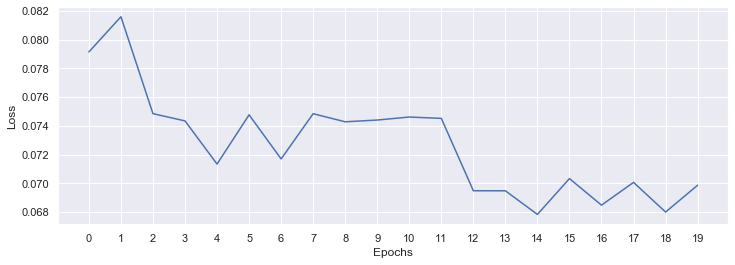

In [36]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [37]:

lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [38]:

lstm_predictions_scaled

[array([0.2866579], dtype=float32),
 array([0.34699202], dtype=float32),
 array([0.38276404], dtype=float32),
 array([0.40623683], dtype=float32),
 array([0.42236423], dtype=float32),
 array([0.43311256], dtype=float32),
 array([0.43955445], dtype=float32),
 array([0.44446093], dtype=float32),
 array([0.4514802], dtype=float32),
 array([0.4576397], dtype=float32),
 array([0.46365893], dtype=float32),
 array([0.46927965], dtype=float32),
 array([0.4743355], dtype=float32),
 array([0.4780264], dtype=float32),
 array([0.4809013], dtype=float32),
 array([0.48318887], dtype=float32),
 array([0.4850335], dtype=float32),
 array([0.48655707], dtype=float32),
 array([0.4878347], dtype=float32),
 array([0.48892027], dtype=float32),
 array([0.4898451], dtype=float32),
 array([0.4906283], dtype=float32),
 array([0.49128515], dtype=float32),
 array([0.49183136], dtype=float32)]

In [39]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [40]:
lstm_predictions

array([[12.08266713],
       [12.27788876],
       [12.39363543],
       [12.46958576],
       [12.52176882],
       [12.55654692],
       [12.57739079],
       [12.59326655],
       [12.61597867],
       [12.63590876],
       [12.65538505],
       [12.67357187],
       [12.68993095],
       [12.7018735 ],
       [12.71117578],
       [12.7185776 ],
       [12.72454627],
       [12.729476  ],
       [12.73360998],
       [12.73712256],
       [12.740115  ],
       [12.7426492 ],
       [12.74477453],
       [12.74654191]])

In [41]:
test_data['LSTM_Predictions'] = lstm_predictions

In [42]:
test_data

,Value,ARIMA_Predictions,LSTM_Predictions
BatchNo,,,
2019-11-03,11.253514,11.228163,12.082667
2019-11-04,11.253514,11.208709,12.277889
2019-11-05,11.253514,11.127784,12.393635
2019-11-06,11.253514,11.128678,12.469586
2019-11-07,11.253514,11.108617,12.521769
2019-11-08,11.253514,11.089022,12.556547
2019-11-09,11.253514,11.056356,12.577391
2019-11-10,11.253514,11.098254,12.593267
2019-11-11,11.253514,11.070991,12.615979


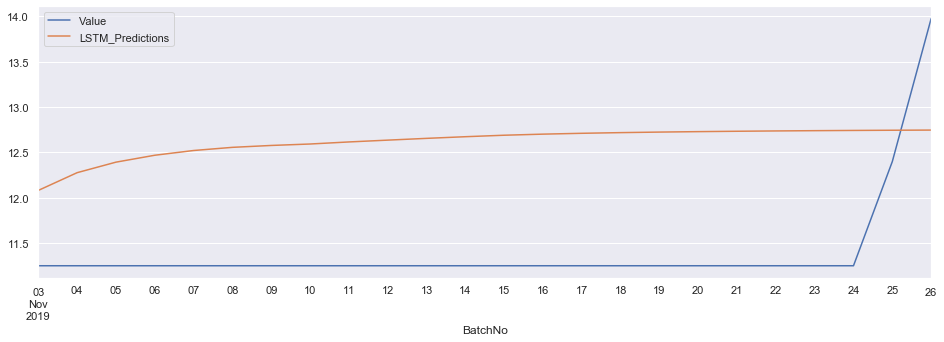

In [44]:
test_data.Value.plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [47]:
lstm_rmse_error = rmse(test_data.Value, test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df.Value.mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 1.7639704030914651
RMSE Error: 1.3281454751236648
Mean: 12.516307436559854


# Prophet Forecast

In [48]:
df_pr = df.copy()
df_pr = df.reset_index()

In [49]:

df_pr.columns = ['ds','y'] # To use prophet column names should be like that

In [50]:
train_data_pr = df_pr.iloc[:len(df)-24]
test_data_pr = df_pr.iloc[len(df)-24:]

In [51]:
from fbprophet import Prophet

In [52]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:

prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
130,2020-07-01,9.831188,8.450512,10.598009,9.748869,9.918636,-0.307967,-0.307967,-0.307967,-0.307967,-0.307967,-0.307967,0.0,0.0,0.0,9.523221
131,2020-08-01,9.535757,8.725763,10.799627,9.441103,9.641276,0.241001,0.241001,0.241001,0.241001,0.241001,0.241001,0.0,0.0,0.0,9.776758
132,2020-09-01,9.240325,7.795514,9.959563,9.127286,9.364374,-0.354106,-0.354106,-0.354106,-0.354106,-0.354106,-0.354106,0.0,0.0,0.0,8.886219
133,2020-10-01,8.954424,8.121663,10.283803,8.819154,9.099992,0.288448,0.288448,0.288448,0.288448,0.288448,0.288448,0.0,0.0,0.0,9.242872
134,2020-11-01,8.658992,7.990331,10.068434,8.506209,8.825662,0.316333,0.316333,0.316333,0.316333,0.316333,0.316333,0.0,0.0,0.0,8.975325


In [54]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-24:]['ds'], "Pred" : prophet_pred[-24:]["yhat"]})

In [55]:
prophet_pred = prophet_pred.set_index("Date")

In [56]:
prophet_pred

,Pred
Date,
2019-10-22,11.888186
2019-10-23,11.924794
2019-10-24,12.511680
2019-10-25,12.159139
2019-10-26,12.445173
2019-10-27,12.510974
2019-10-28,12.055966
2019-10-29,11.821475
2019-10-30,11.858084


In [57]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [58]:
import seaborn as sns

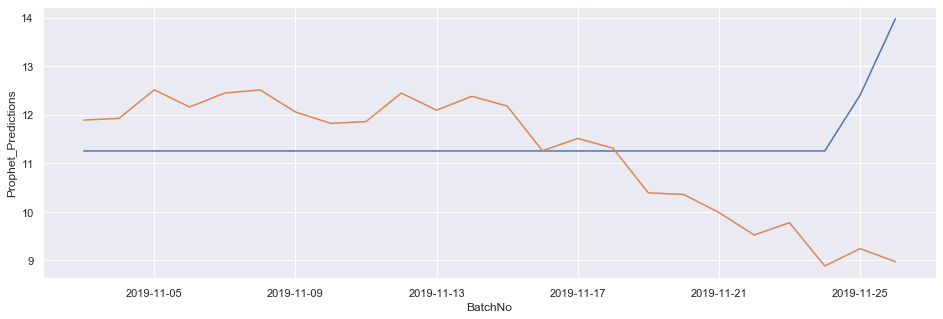

In [60]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data.Value)
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [64]:
prophet_rmse_error = rmse(test_data.Value, test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df.Value.mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 2.5321704677528962
RMSE Error: 1.5912795064830365
Mean: 12.516307436559854


In [65]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

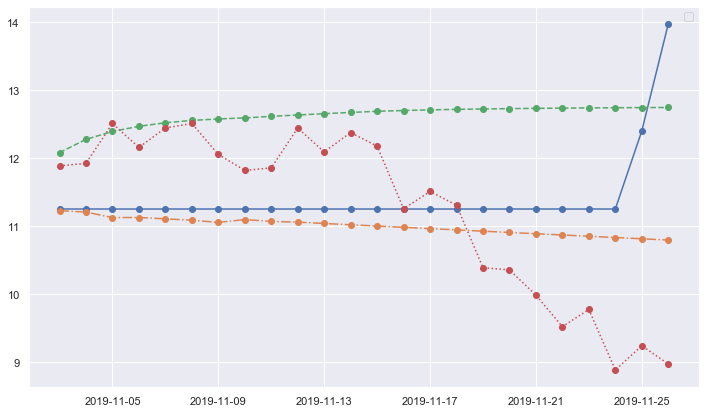

In [67]:
# import logging
# logging.getLogger().setLevel(logging.CRITICAL)


plt.figure(figsize=(12,7))
plt.plot_date(test_data.index, test_data.Value, linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()




In [69]:
print(f"Mean: {test_data.Value.mean()}")
errors

Mean: 11.414589768329165


,Models,RMSE Errors,MSE Errors
0,ARIMA,0.765449,0.585912
1,LSTM,1.328145,1.763970
2,Prophet,1.591280,2.532170
